##### Importing Libs

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from decouple import config
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
RAW_DATA_PATH = config('RAW_DATA_PATH')

##### Load data

In [17]:
df_tmp = pd.read_csv(RAW_DATA_PATH+'database_home_appliances.csv')

##### Methods

In [18]:
def plot_classes (dataframe:pd.DataFrame)->list :
  '''
    This method plot a mean of group of Classes.

    Args :
      dataframe : A dataframe to calc mean of value columns to plot
  '''
  fig, axs = plt.subplots(len(dataframe.Classes.unique()), figsize=(45,25))
  
  for class_ in dataframe.Classes.unique() :
    axs[class_-1].plot(list(dataframe.columns)[:-1],dataframe.loc[dataframe['Classes'] == class_].drop(columns='Classes').iloc[0])


##### Verifying data

In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 201 entries, t0 to Classes
dtypes: float64(200), int64(1)
memory usage: 157.2 KB


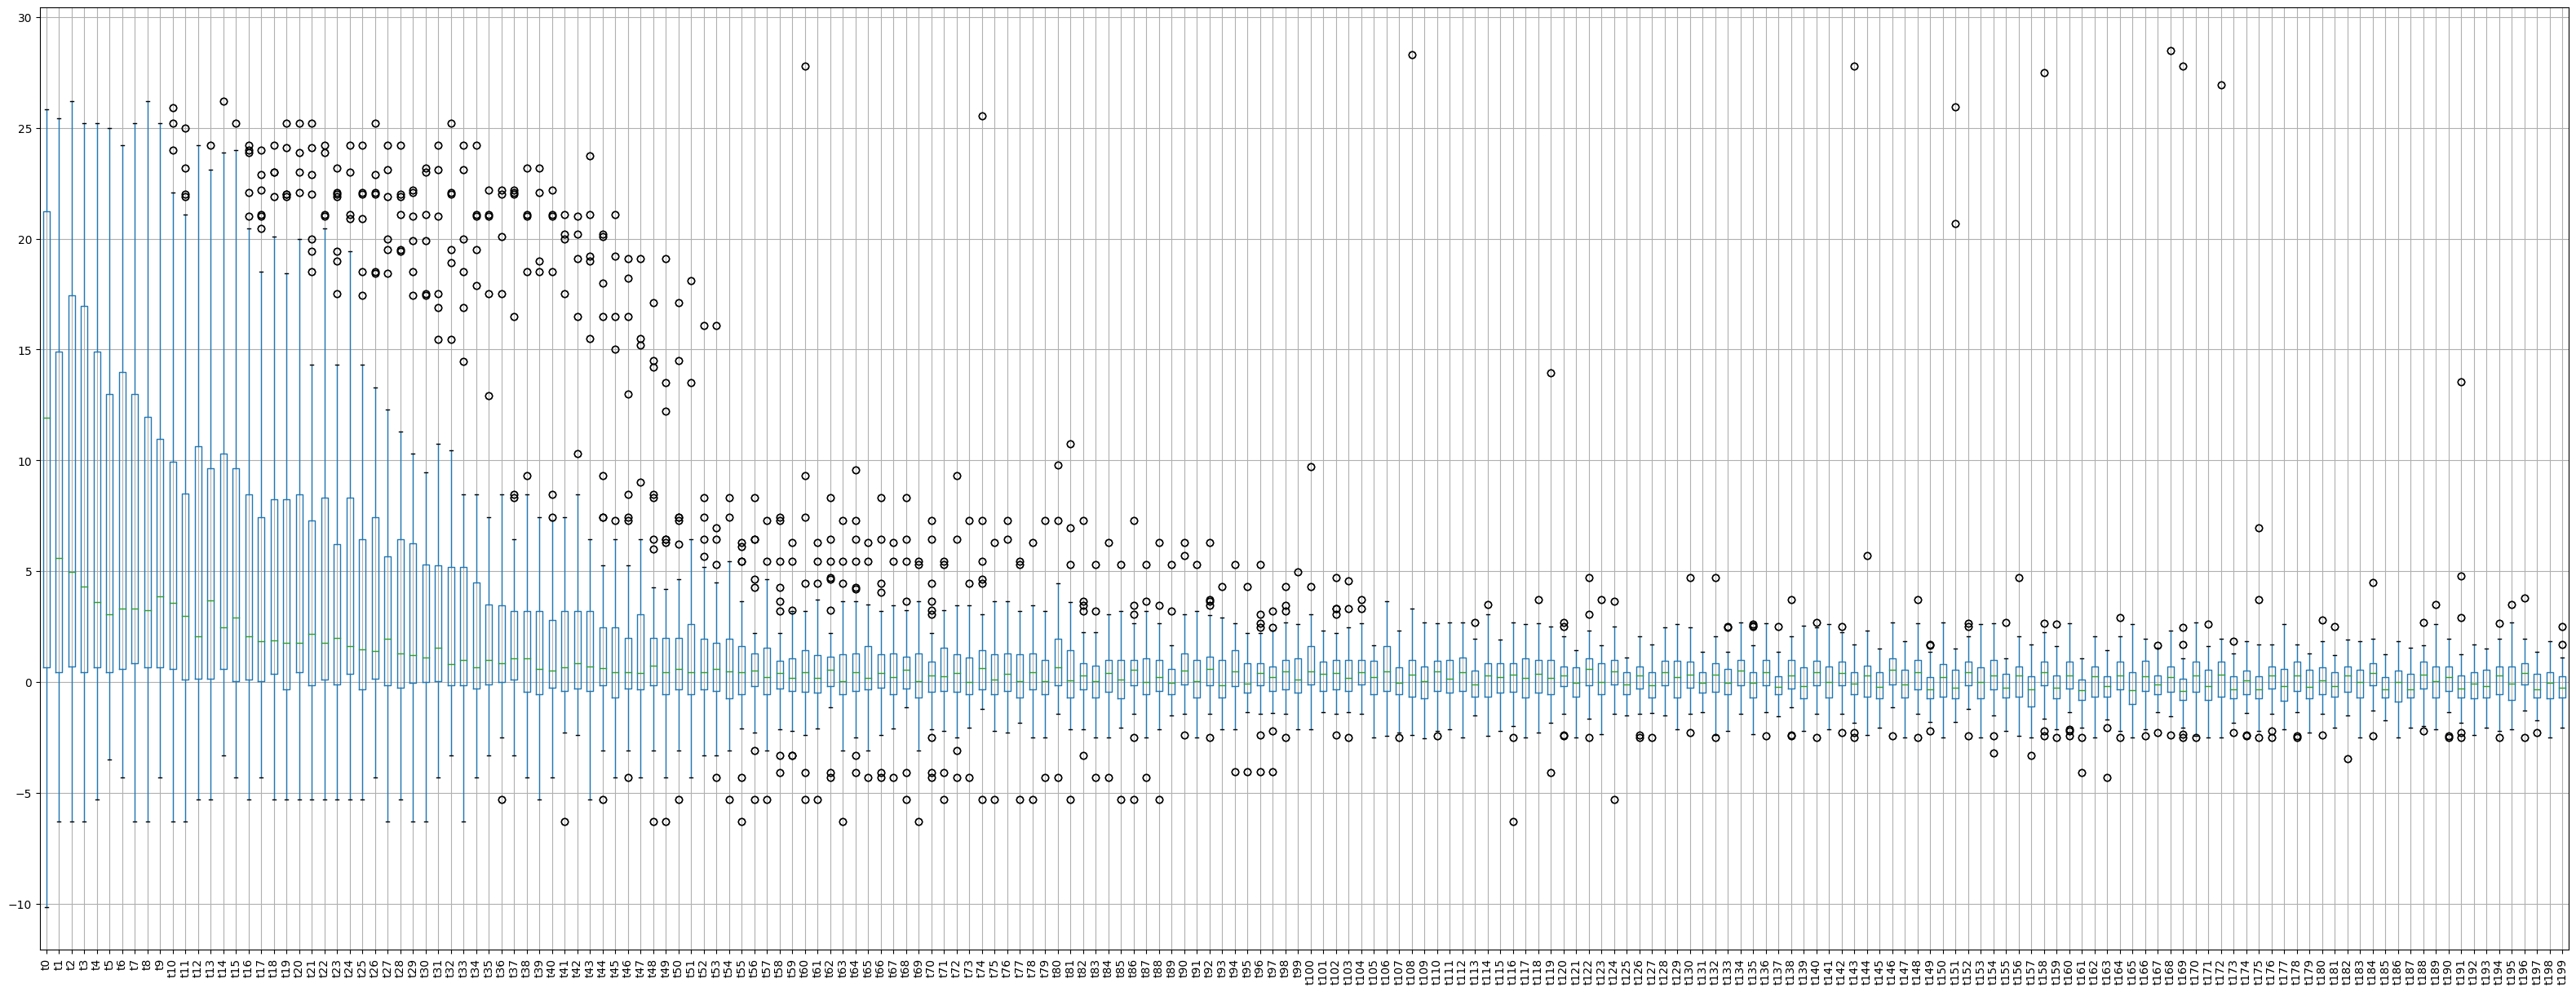

In [20]:
# ploting columns to verify outlier data and more.
plt.figure(figsize=(40,15))
df_tmp.drop(columns='Classes').boxplot()
plt.xticks(rotation = 90)
plt.show()

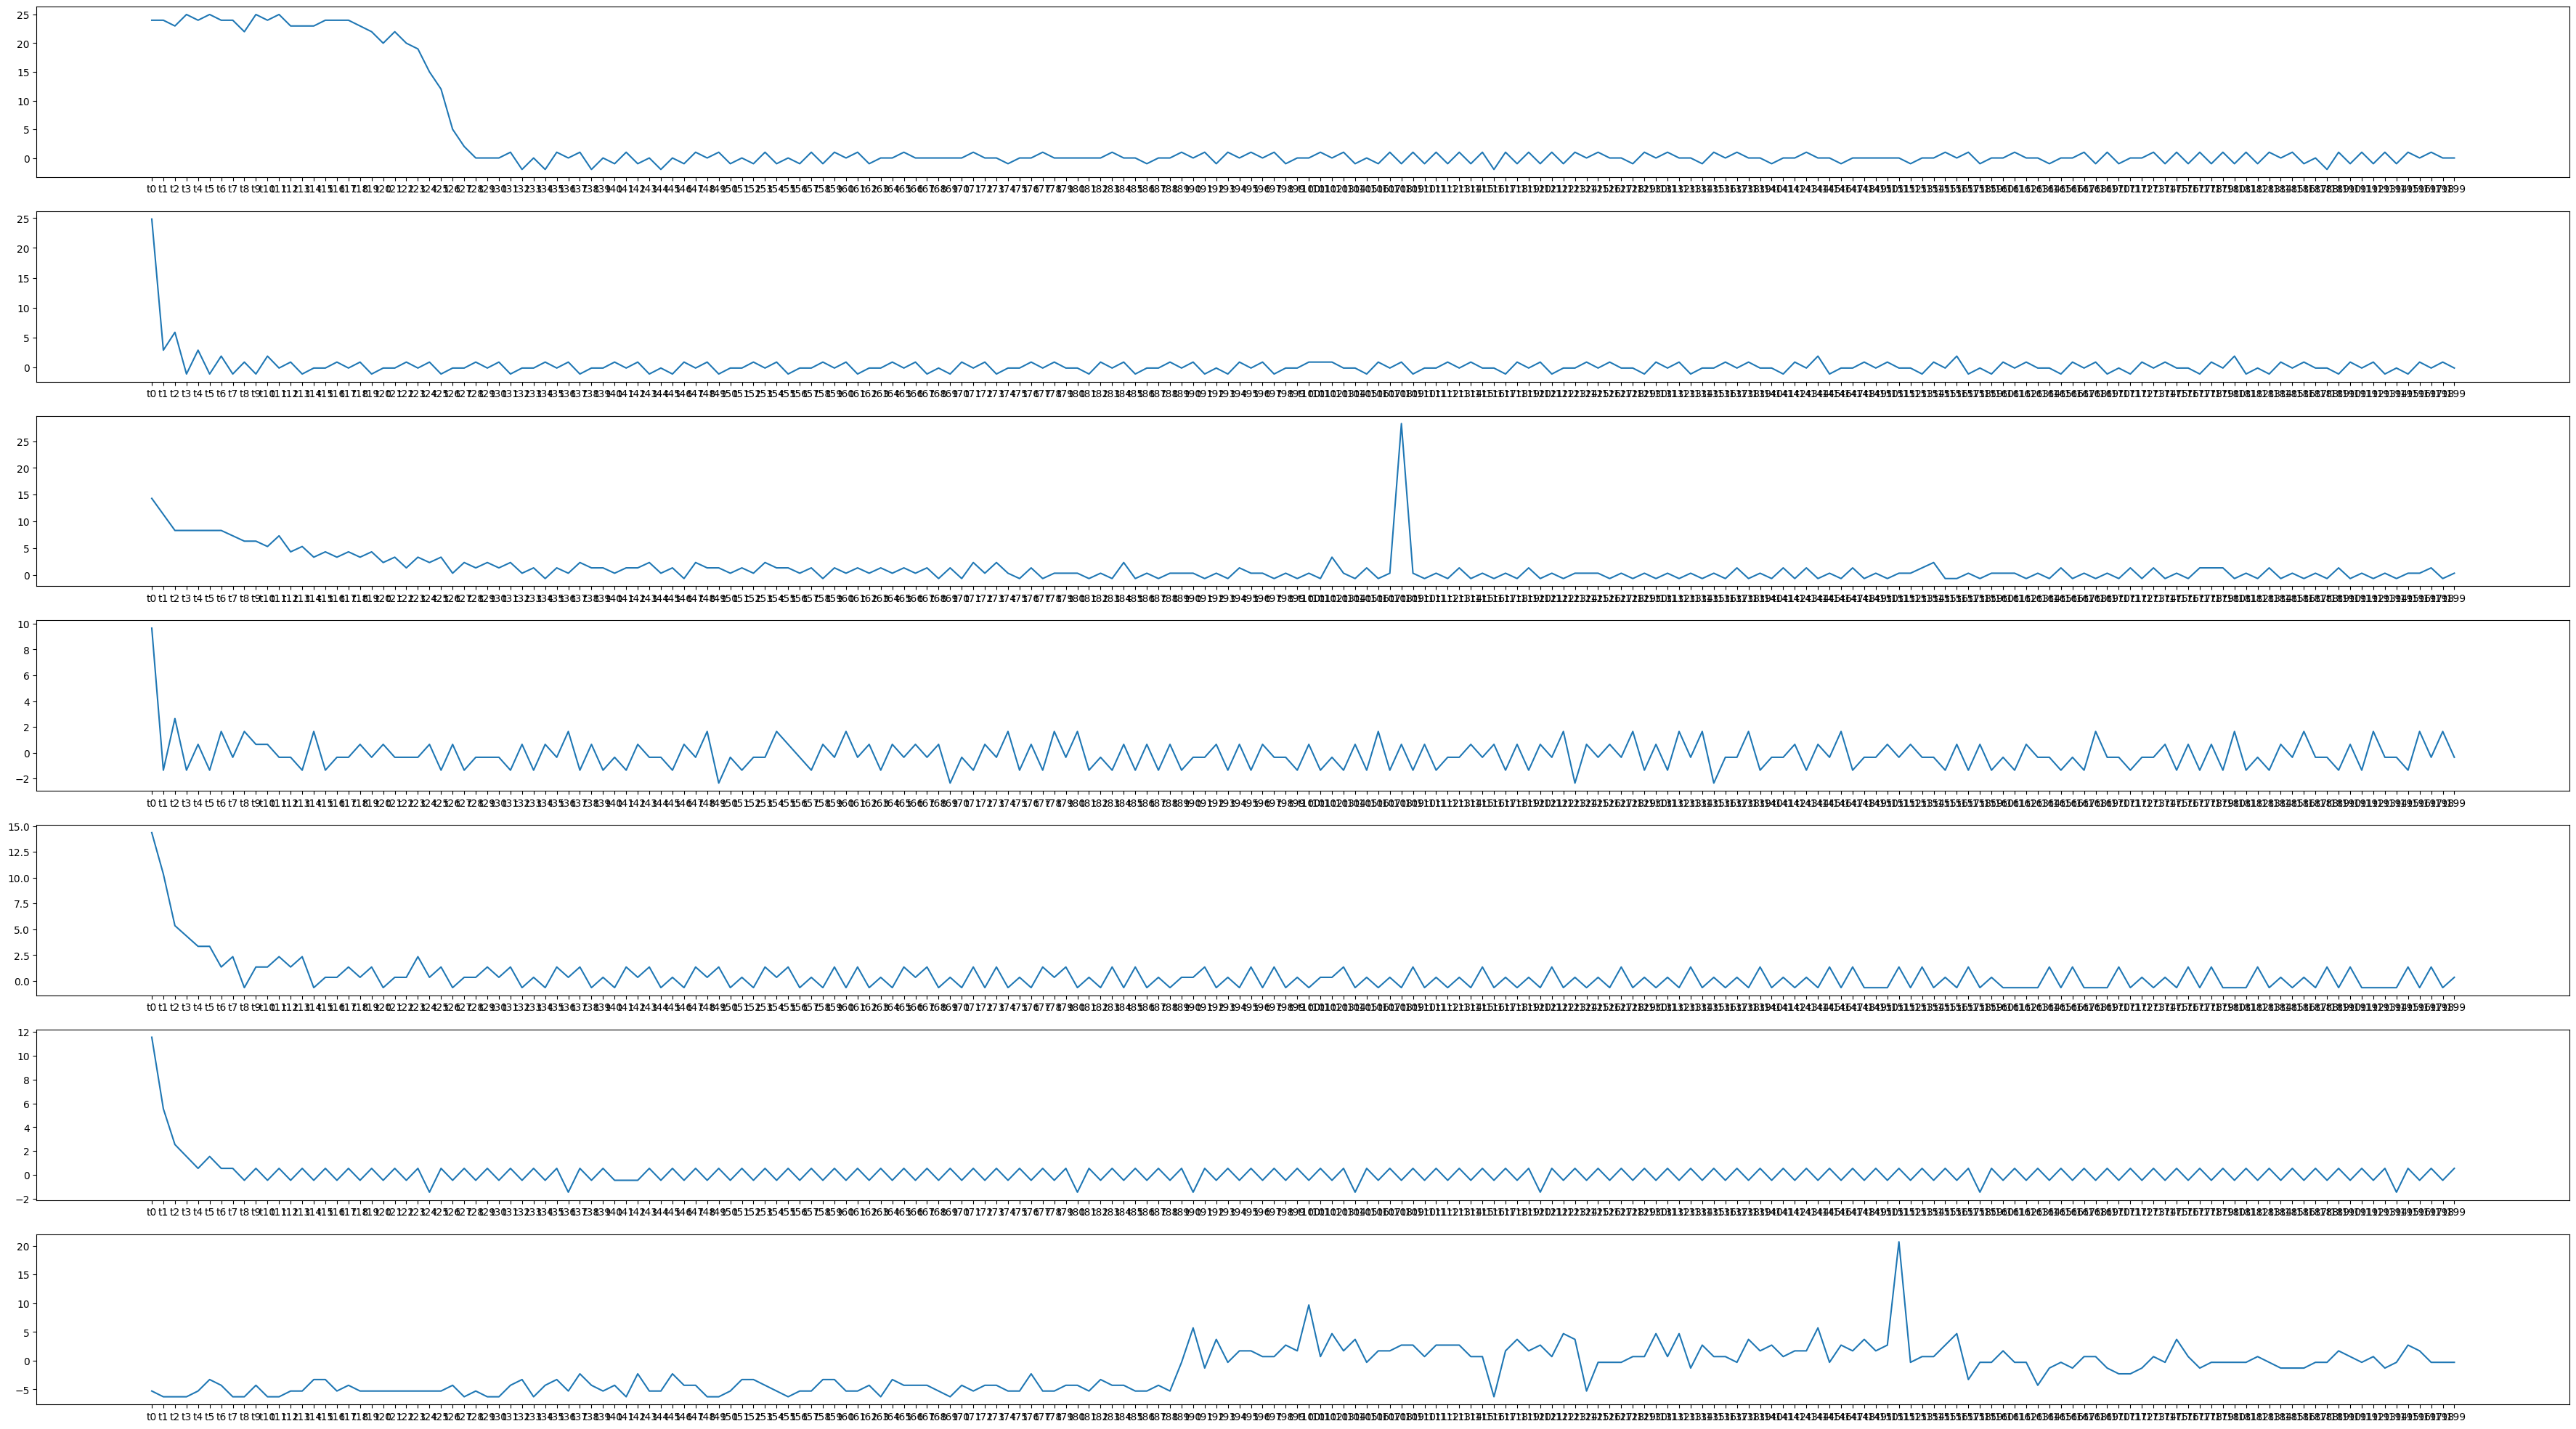

In [21]:
plot_classes(df_tmp)

##### Process data

In [24]:
# Preparing data to split
X = df_tmp.drop(columns='Classes')
y = df_tmp['Classes']

In [58]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42, stratify=y)

In [59]:
# Rescaling data
scaler_ = StandardScaler()
X_train = scaler_.fit_transform(X_train)

In [60]:
mlp_classifier = MLPClassifier()

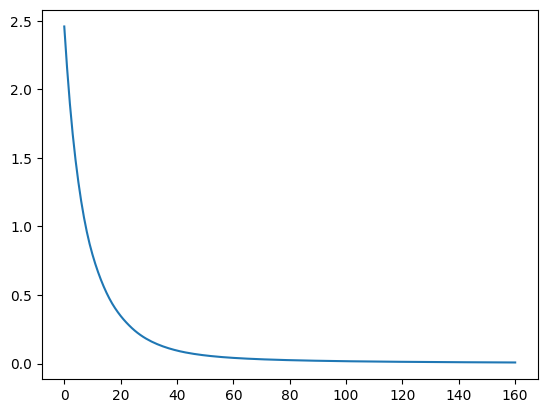

In [61]:
mlp_classifier.fit(X_train,y_train)
plt.plot(mlp_classifier.loss_curve_)